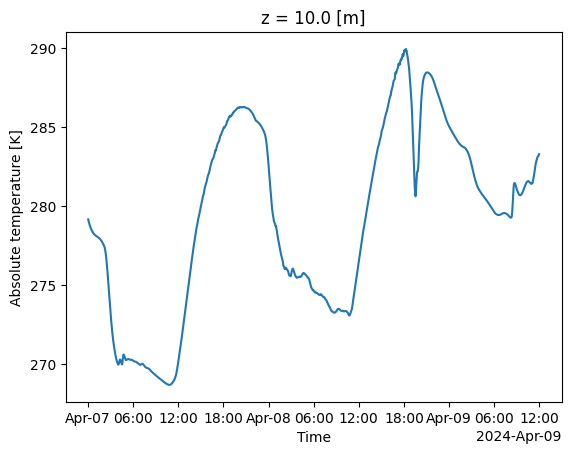

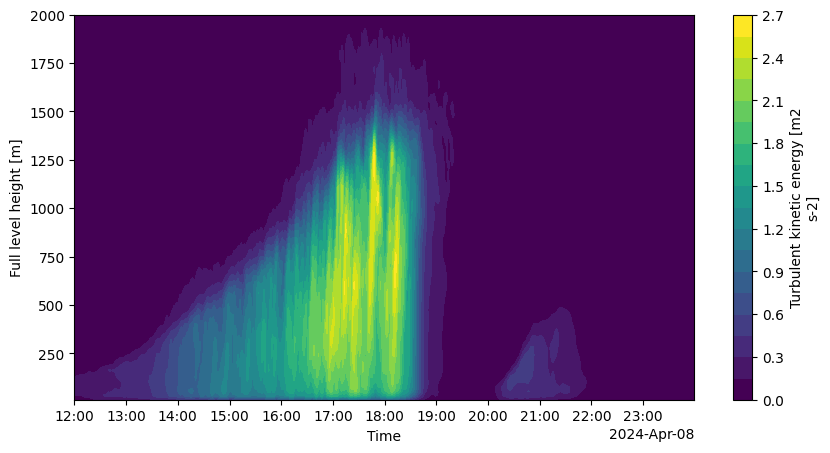

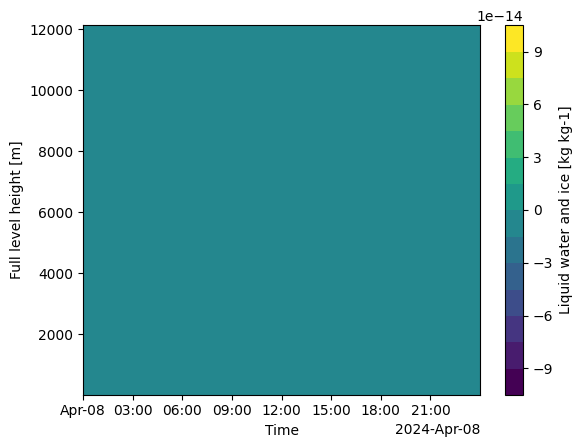

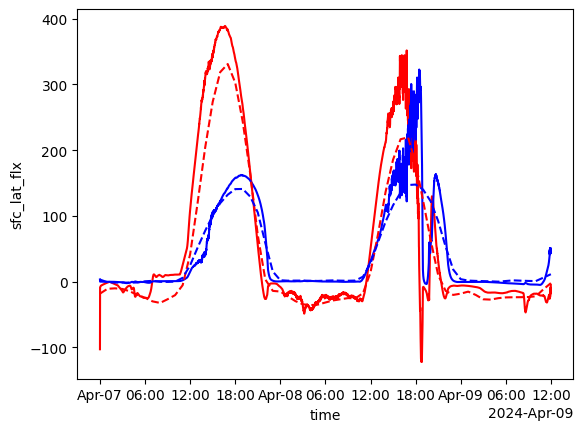

In [1]:
import open_xarray as ox
import numpy as np
import xarray as xr
import matplotlib.pyplot as pl

# Load the data
ds=ox.open_xarray('/fs/ess/PFS0220/LSM/Eclipse/NY_20240408/NY.default.0000000.nc')
ERA=xr.open_dataset('/users/PFS0220/graghuna/microhh/microhh_lagtraj/microhh/python/data/forcings/NY_20240408.kpt.nc',decode_times=True)

pl.figure()
ds.T.sel(z=10).plot()

pl.figure(figsize=(10,5))
ds.isel(time=slice(36*120,48*120)).tke.sel(z=slice(10,2000)).plot.contourf(x='time',levels=20)

pl.figure()
ds.qlqi.isel(time=slice(24*120,48*120)).plot.contourf(x='time',levels=20)

pl.figure()
ds.H.plot.line('r-',x='time')
ds.LE.plot.line('b-',x='time')
(-1*ERA['sfc_sens_flx']).plot.line('r--',x='time')
(-1*ERA['sfc_lat_flx']).plot.line('b--',x='time')

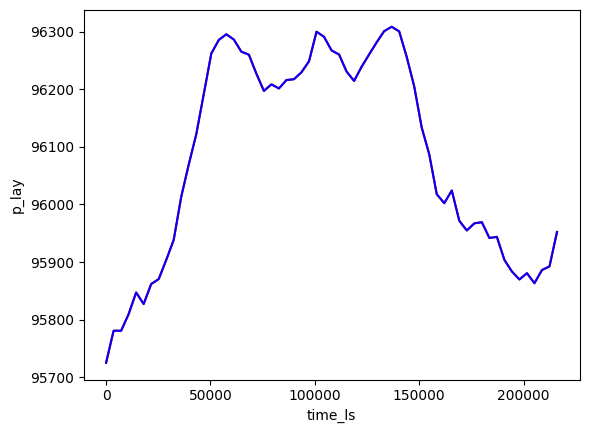

In [11]:
ds=xr.open_dataset('/fs/ess/PFS0220/LSM/Eclipse/NY_20240408/NY_input_old.nc',group='timedep')
ds2=xr.open_dataset('/fs/ess/PFS0220/LSM/Eclipse/NY_20240408/NY_input.nc',group='timedep')

ds.p_lay.isel(lay=0).plot.line('r-',x='time_ls')
ds2.p_lay.isel(lay=0).plot.line('b-',x='time_ls')


In [7]:
ds

<xarray.Dataset>
Dimensions:       (time_ls: 61, lay: 140, lev: 141, time_nudge: 61,
                   time_surface: 61, time_latlon: 61, z: 159, zh: 160)
Coordinates:
  * time_ls       (time_ls) float64 0.0 3.6e+03 7.2e+03 ... 2.124e+05 2.16e+05
  * time_nudge    (time_nudge) float64 0.0 3.6e+03 ... 2.124e+05 2.16e+05
  * time_surface  (time_surface) float64 0.0 3.6e+03 ... 2.124e+05 2.16e+05
  * time_latlon   (time_latlon) float64 0.0 3.6e+03 ... 2.124e+05 2.16e+05
Dimensions without coordinates: lay, lev, z, zh
Data variables: (12/22)
    p_lay         (time_ls, lay) float64 ...
    p_lev         (time_ls, lev) float64 ...
    t_lay         (time_ls, lay) float64 ...
    t_lev         (time_ls, lev) float64 ...
    o3_bg         (time_ls, lay) float64 ...
    h2o_bg        (time_ls, lay) float64 ...
    ...            ...
    qt_nudge      (time_nudge, z) float64 ...
    thl_sbot      (time_surface) float64 ...
    qt_sbot       (time_surface) float64 ...
    p_sbot        (time_surface) float64 ...
    lat           (time_latlon) float64 ...
    lon           (time_latlon) float64 ...